# Visualization Recursive Feature Elimination 

In [2]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score, auc, precision_recall_curve, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import confusion_matrix 
from collections import Counter

# Import data 

In [3]:
# Load the data into pandas dataframes
X_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_train_res.csv')
y_train_res = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/y_train_res.csv')
X_test = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/X_test.csv')
y_test = pd.read_csv('/Users/dionnespaltman/Desktop/V4/data/y_test.csv')

X_train_res = X_train_res.drop(columns='Unnamed: 0', axis=1)
y_train_res = y_train_res.drop(columns='Unnamed: 0', axis=1)
X_test = X_test.drop(columns='Unnamed: 0', axis=1)
y_test = y_test.drop(columns='Unnamed: 0', axis=1)

# Convert the DataFrame to a 1-dimensional NumPy array
y_train_res = y_train_res.values.ravel()
y_test = y_test.values.ravel()

In [9]:
display(X_train_res)

,VVR_1,VVR_2,AU01_r__sum_values,AU01_r__variance,AU01_r__standard_deviation,AU01_r__maximum,AU01_r__mean,AU01_r__root_mean_square,AU02_r__sum_values,AU02_r__variance,...,AU26_r__standard_deviation,AU26_r__maximum,AU26_r__mean,AU26_r__root_mean_square,AU45_r__sum_values,AU45_r__variance,AU45_r__standard_deviation,AU45_r__maximum,AU45_r__mean,AU45_r__root_mean_square
0,12.000000,13.000000,-0.070220,-0.403569,-0.161650,0.428359,-0.673859,-0.387663,0.994371,0.345623,...,-0.537730,0.225549,-1.036133,-0.951754,-1.025247,-1.526773,-1.479742,-1.237893,-2.161830,-2.049390
1,10.000000,10.000000,2.226447,1.288304,1.124217,0.514376,0.729448,1.091318,3.433959,2.208680,...,0.774622,0.458331,0.368352,0.632011,1.209277,-0.225126,-0.001447,0.619766,-0.202961,-0.127515
2,8.000000,8.000000,-0.328541,-0.286339,-0.049149,0.514376,-0.191466,-0.152619,-0.351110,-0.286124,...,0.539267,0.408449,0.316323,0.450683,-0.834081,-0.909004,-0.642000,0.297037,-1.125698,-0.981679
3,10.000000,8.000000,-0.179816,1.024130,0.956659,0.514376,0.292720,0.824388,-0.176376,0.226388,...,0.891064,0.458331,0.480862,0.766552,-0.208294,0.810246,0.749643,0.257680,0.422548,0.743912
4,8.000000,8.000000,-0.687261,-0.791730,-0.584920,0.514376,-0.763173,-0.767495,-0.530851,-0.455929,...,-0.558621,0.366881,-0.858611,-0.877156,-0.419249,-0.490562,-0.230352,-0.340549,-0.573360,-0.444615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,15.208788,9.791212,-0.487217,-0.225515,0.005625,0.181101,-0.528458,-0.206212,-0.503146,-0.506388,...,-0.226106,0.412286,-0.469718,-0.456650,-0.012510,0.388434,0.334707,0.252315,0.284033,0.322442
108,16.925449,10.850899,-0.629858,-0.610840,-0.380021,0.392113,-0.678192,-0.572561,-0.503282,-0.437112,...,-0.168894,0.458331,-0.072297,-0.205383,-0.447768,-0.289515,-0.066093,0.619766,-0.590136,-0.295949
109,10.986887,11.973774,1.755451,0.208069,0.373092,0.514376,0.195169,0.312097,0.745968,-0.354988,...,0.398382,0.458331,0.303690,0.353698,3.025754,1.353332,1.082597,0.619766,1.220385,1.279031
110,15.861224,10.544490,-0.583734,-0.648807,-0.418202,0.436879,-0.696419,-0.609791,-0.462160,-0.415041,...,0.646099,0.458331,0.929210,0.852713,-0.537762,-0.516713,-0.266038,0.470967,-0.855955,-0.556206


In [4]:
!pip install yellowbrick

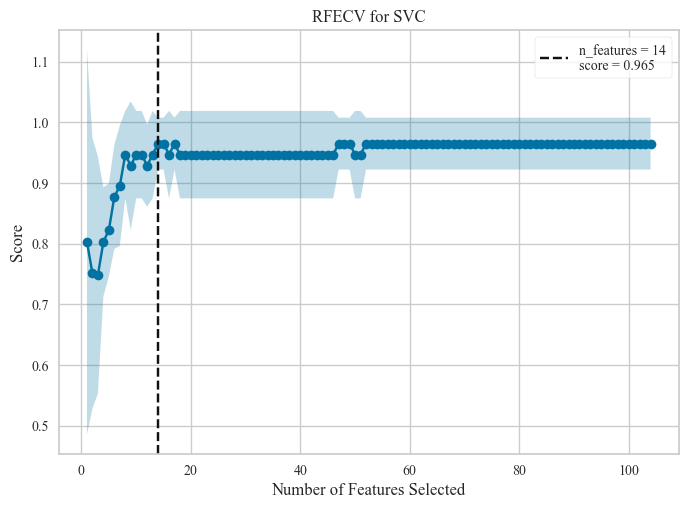

<Axes: title={'center': 'RFECV for SVC'}, xlabel='Number of Features Selected', ylabel='Score'>

In [8]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt

# Create a recall scorer
recall_scorer = make_scorer(recall_score)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1), scoring=recall_scorer)

visualizer.fit(X_train_res, y_train_res)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

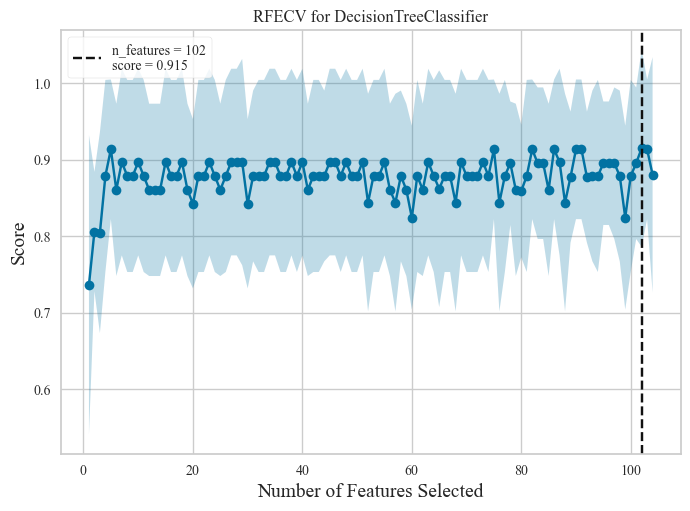

<Axes: title={'center': 'RFECV for DecisionTreeClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

In [10]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from yellowbrick.model_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, recall_score
import matplotlib.pyplot as plt

# Create a recall scorer
recall_scorer = make_scorer(recall_score)

# Instantiate RFECV visualizer with a DecisionTreeClassifier and the recall scorer
visualizer = RFECV(DecisionTreeClassifier(), scoring=recall_scorer)

# Fit the data to the visualizer
visualizer.fit(X_train_res, y_train_res)

# Set the title with the desired font properties
visualizer.ax.set_title('Your Custom Title', fontsize=16, fontname='Times New Roman')

# Set the font properties for x and y axis titles
visualizer.ax.set_xlabel(visualizer.ax.get_xlabel(), fontsize=14, fontname='Times New Roman')
visualizer.ax.set_ylabel('Recall', fontsize=14, fontname='Times New Roman')

# Customize other font properties if needed
plt.rcParams['font.family'] = 'Times New Roman'

# Finalize and render the figure
visualizer.show()
